In [25]:
import sys
sys.path.append('../../build')
sys.path.append('../')
import IPSModule as ips
import helpers as hp
from utils import SimulationVisualizer
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import lattpy as lp

In [49]:
import importlib
importlib.reload(hp)

<module 'helpers' from '/mnt/c/Users/marka/OneDrive/Documents/Uni/Edinburgh Uni/MSc/RSCAM/S2 group proj/IPS/scripts/harmonic_oscillator/helpers.py'>

In [41]:
def initialise_langevin_simulator(gamma = 1, temperature = 0.2, rad = 15.0, epsilon = 1.0, sigma = 1.0):
    # Set up 2 particle system, with particles sitting just at the boundary
    init_dis = 2 ** (1.0 / 6.0) * sigma

    num_particles = 2
    init_particles_positions = np.array([[0, 0], [init_dis, 0]])
    particles = ips.LangevinSystem(num_particles, gamma, temperature)

    # set the initial positions in our system
    for i in range(num_particles):
        for d in range(2):
            particles.get_positions()[d][i] = init_particles_positions[i][d]
            particles.get_velocities()[d][i] = 0.0

    pair_force_config = {
        "type": "LennardJones",
        "eps": epsilon,
        "sigma": sigma
    }

    confinement_config = {
        "type": "Radial",
        "rad": rad
    }
    simulator = ips.IPS_Simulator_Langevin(particles)
    simulator.init(pair_force_config, confinement_config)

    return particles, simulator

In [62]:
help(simulator)

Help on IPS_Simulator_Langevin in module IPSModule object:

class IPS_Simulator_Langevin(pybind11_builtins.pybind11_object)
 |  Method resolution order:
 |      IPS_Simulator_Langevin
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(...)
 |      __init__(self: IPSModule.IPS_Simulator_Langevin, arg0: LangevinSystem<2ul>) -> None
 |  
 |  init(...)
 |      init(self: IPSModule.IPS_Simulator_Langevin, arg0: dict, arg1: dict) -> None
 |  
 |  integrate(...)
 |      integrate(self: IPSModule.IPS_Simulator_Langevin, arg0: float) -> None
 |  
 |  integrate_n_steps(...)
 |      integrate_n_steps(self: IPSModule.IPS_Simulator_Langevin, arg0: float, arg1: int) -> None
 |  
 |  ----------------------------------------------------------------------
 |  Static methods inherited from pybind11_builtins.pybind11_object:
 |  
 |  __new__(*args, **kwargs) from pybind11_builtins.pybind11_type
 |      Create and return a new object.  See he

In [ ]:
def langevin_integrator(h, n_steps, sigma):
    particles, simulator = initialise_langevin_simulator(sigma=sigma)
    simulator.integrate_n_steps(h, n_steps)
    final_positions = particles.get_positions()
    trajects = [np.array([final_position]) for final_position in final_positions]
    return trajects

In [52]:
sigmas = np.linspace(0.1, 5, 10) #1.0

In [60]:
thresholds = [None] * len(sigmas)
for i, sigma in enumerate(sigmas):
    print(f"{sigma=}")
    integrator = lambda h, n_steps: langevin_integrator(h, n_steps, sigma)
    thresholds[i] = hp.get_stability_threshold(integrator, h_init=1, n_integration_steps = 100000, verbose = True)

sigma=0.1
Step 1: big jumps
Unstable, trying h=0.5
[array([[nan, nan]]), array([[nan, nan]])]
Unstable, trying h=0.25
[array([[nan, nan]]), array([[nan, nan]])]
Unstable, trying h=0.125
[array([[nan, nan]]), array([[nan, nan]])]
Unstable, trying h=0.0625
[array([[nan, nan]]), array([[nan, nan]])]
Unstable, trying h=0.03125
[array([[ 1.22828311, -1.66097304]]), array([[14.8239135 ,  9.88344537]])]
Step 1 complete, h_l=0.03125, h_r=0.0625
h_mid=0.046875, stable
h_mid=0.0546875, unstable
h_mid=0.05078125, unstable
h_mid=0.048828125, unstable
h_mid=0.0478515625, unstable
h_mid=0.04736328125, unstable
h_mid=0.047119140625, unstable
h_mid=0.0469970703125, stable
h_mid=0.04705810546875, unstable
h_mid=0.047027587890625, unstable
h_mid=0.0470123291015625, unstable
h_mid=0.04700469970703125, stable
h_mid=0.047008514404296875, unstable
h_mid=0.04700660705566406, unstable
h_mid=0.047005653381347656, unstable
h_mid=0.04700517654418945, unstable
h_mid=0.04700493812561035, stable
h_mid=0.04700505733

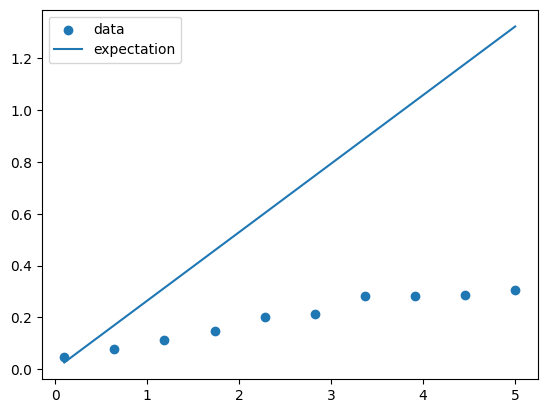

In [61]:
plt.scatter(sigmas, thresholds, label = "data")
plt.plot(sigmas, 2*sigmas / (7.56 * np.sqrt(1)), label = "expectation")
plt.legend()
plt.show()